In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.datasets import mnist

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(-0.5, 27.5, 27.5, -0.5)

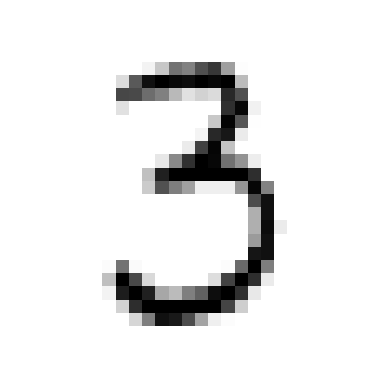

In [16]:
single_img = X_train[50]
plt.imshow(single_img,cmap = 'gray_r')
plt.axis('off')

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
# reshaping to 2d array
x_train_flat = X_train.reshape(-1, 28  * 28  )
x_test_flat = X_test.reshape(-1, 28  * 28)
x_train_flat.shape

(60000, 784)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler  = MinMaxScaler()

In [21]:
normalised_xtrain = scaler.fit_transform(x_train_flat)
normalised_xtest = scaler.transform(x_test_flat)

In [22]:
x_train = normalised_xtrain.reshape(-1,28,28,1)
x_test = normalised_xtest.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

(-0.5, 27.5, 27.5, -0.5)

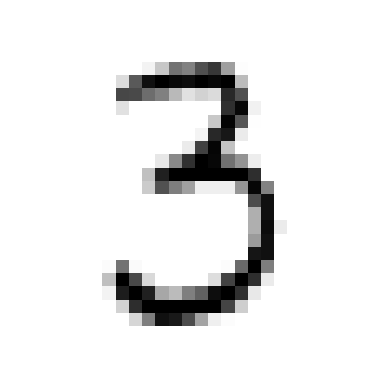

In [23]:
plt.imshow(x_train[50],cmap = 'gray_r')
plt.axis('off')

In [24]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation  = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [27]:
model.compile(loss = "categorical_crossentropy",optimizer = 'rmsprop',metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
model.fit(x_train,y_train_categorical,epochs=1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1366 - accuracy: 0.9577


In [30]:
model.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9838


[0.049331679940223694, 0.9837999939918518]

In [31]:
prediction = model.predict(x_test)
prediction_class = np.argmax(prediction,axis = 1)
prediction_class

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
model.save('mnist_classification_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
from keras.models import load_model
loaded_model = load_model('mnist_classification_1.h5')
np.argmax(loaded_model.predict(x_test),axis = 1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])



### GANs

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, kernel_size=5, strides=1, padding="same", activation="relu"),
        layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"),
        layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh"),
    ],
    name="generator",
)

discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=5, strides=2, padding="same", activation=keras.layers.LeakyReLU(0.3)),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=5, strides=2, padding="same", activation=keras.layers.LeakyReLU(0.3)),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Combine the generator and discriminator into a single model
gan = keras.Sequential([generator, discriminator])

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.5), metrics=["accuracy"])

# Compile the GAN
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.5))

# Load the MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Train the GAN
epochs = 10
batch_size = 128
steps_per_epoch = int(x_train.shape[0] / batch_size)
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step in range(steps_per_epoch):
        # Generate random noise
        noise = tf.random.normal(shape=(batch_size, 100))
        # Generate fake images
        fake_images = generator(noise)
        # Combine real and fake images
        combined_images = tf.concat([fake_images, x_train[step * batch_size : (step + 1) * batch_size]], axis=0)
        # Labels for real and fake images
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)
        # Add random noise to the labels
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        d_loss = discriminator.train_on_batch(combined_images, labels)
        # Generate random noise
        noise = tf.random.normal(shape=(batch_size, 100))
        # Labels for fake images
        misleading_labels = tf.ones((batch_size, 1))
        # Train the generator
        g_loss = gan.train_on_batch(noise, misleading_labels)
    print(f"Discriminator loss: {d_loss}")
    print(f"Generator loss: {g_loss}")

Epoch 1/10
Discriminator loss: [1.3565024137496948, 0.0]
Generator loss: 0.11551545560359955
Epoch 2/10
Discriminator loss: [1.2830356359481812, 0.0]
Generator loss: 0.10844691842794418
Epoch 3/10
Discriminator loss: [1.2656254768371582, 0.0]
Generator loss: 0.10649662464857101
Epoch 4/10
Discriminator loss: [1.265717625617981, 0.0]
Generator loss: 0.10652479529380798
Epoch 5/10
Discriminator loss: [1.2575180530548096, 0.0]
Generator loss: 0.10869041830301285
Epoch 6/10
Discriminator loss: [1.2653326988220215, 0.0]
Generator loss: 0.10478333383798599
Epoch 7/10
Discriminator loss: [1.28579843044281, 0.0]
Generator loss: 0.10381904244422913
Epoch 8/10
Discriminator loss: [1.2818806171417236, 0.0]
Generator loss: 0.10221593081951141
Epoch 9/10
Discriminator loss: [1.4739283323287964, 0.0]
Generator loss: 0.10599066317081451
Epoch 10/10
Discriminator loss: [1.2793270349502563, 0.0]
Generator loss: 0.10265355557203293


1/1 [==============================] - 0s 86ms/step


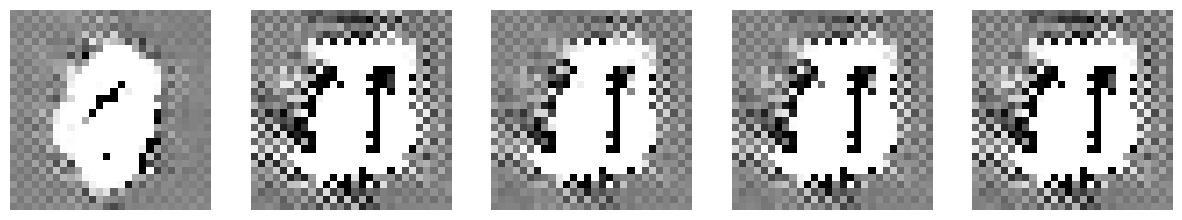

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate images based on random noise
def generate_images(generator_model, num_images=1):
    noise = tf.random.normal(shape=(num_images, 100))
    generated_images = generator_model.predict(noise)
    return generated_images

# Choose the number of images to generate
num_images_to_generate = 5

# Generate images using the generator
generated_images = generate_images(generator, num_images_to_generate)

# Display the generated images
plt.figure(figsize=(15, 3))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 15ms/step


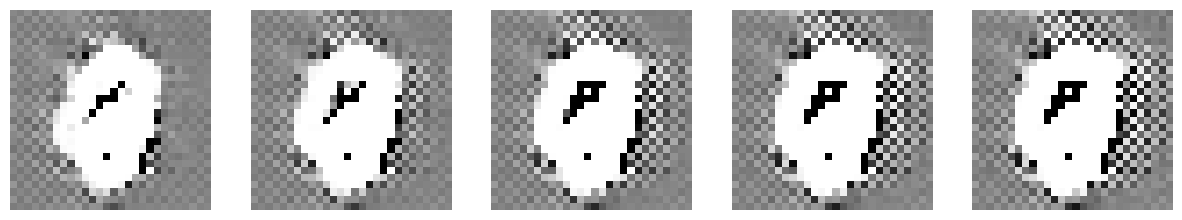

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def interpolate_images(generator_model, num_images=5):
    #random noise vectors
    noise1 = tf.random.normal(shape=(1, 100))
    noise2 = tf.random.normal(shape=(1, 100))

    # Interpolation between the two noise vectors
    interpolation_factors = np.linspace(0, 1, num_images)
    interpolated_noises = [noise1 * (1 - alpha) + noise2 * alpha for alpha in interpolation_factors]

    #images for each interpolated noise vector
    generated_images = [generator_model.predict(noise) for noise in interpolated_noises]

    return generated_images

#number of images to generate
num_interpolated_images = 5

# Generate interpolated images using the generator
interpolated_images = interpolate_images(generator, num_interpolated_images)

plt.figure(figsize=(15, 3))
for i in range(num_interpolated_images):
    plt.subplot(1, num_interpolated_images, i + 1)
    plt.imshow(interpolated_images[i][0, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 18ms/step


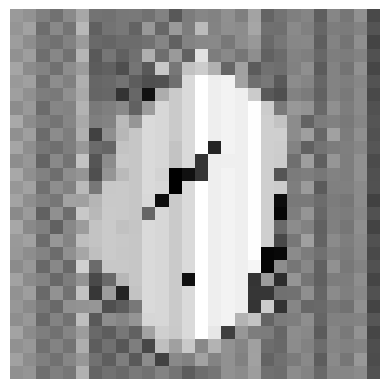

In [41]:
import cv2

def style_transfer(generator_model, content_image_path, num_steps=100, alpha=0.8):
    # Load content image
    content_image = cv2.imread(content_image_path, cv2.IMREAD_GRAYSCALE)
    content_image = cv2.resize(content_image, (28, 28))  #to match the model input size
    content_image = content_image.astype('float32') / 255.0
    content_image = np.expand_dims(content_image, axis=0)

    # Generate a random noise vector
    noise = tf.random.normal(shape=(1, 100))

    # Generate initial stylized image
    stylized_image = generator_model.predict(noise)

    for step in range(num_steps):
        # stylized image dimensions
        stylized_image = stylized_image[:, :28, :28, :]

        # difference between the stylized image and the content image
        diff = content_image - stylized_image
        # Updating the stylized image towards the content image
        stylized_image = stylized_image + alpha * diff / num_steps

    return stylized_image

content_image_path = '/content/win 10.jpg'

# Perform style transfer using the generator
stylized_image = style_transfer(generator, content_image_path)

plt.imshow(stylized_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()